In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, on = "city", how = "left")
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [7]:
# Obtain the x and y coordinates for each of the three city types
# group by city
city = data.groupby("city")
# get total rides for each city
rides = city["ride_id"].count()
rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
# get average fare
fare_avg = city.mean()
fare_avg.head()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Barronchester,36.422500,4.460796e+12,11.0
Bethanyland,32.956111,5.842550e+12,22.0
Bradshawfurt,40.064000,3.735294e+12,7.0


In [10]:
# get the type of city
city_type = city_data.set_index("city")["type"]
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [11]:
# form a new data frame
ride_df = pd.DataFrame({
    "Total Rides": rides,
    "Average Fare": fare_avg["fare"],
    "Number of Drivers": fare_avg["driver_count"],
    "Type of City": city_type
})
    
ride_df.head()

,Total Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


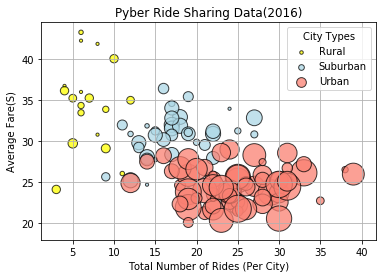

In [28]:
# Build the scatter plots for each city types
urban = ride_df[ride_df['Type of City'] == 'Urban']
suburban = ride_df[ride_df['Type of City'] == 'Suburban']
rural = ride_df[ride_df['Type of City'] == 'Rural']

plt.scatter(rural['Total Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            color = 'yellow', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10,
            color = 'lightblue', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
            color = 'salmon', edgecolor = 'black', label = 'Urban', alpha = .75)

# Create a legend
plt.legend(loc="upper right", title = 'City Types', markerscale = 0.5)

# Incorporate a text label regarding circle size
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(S)")

#  Save Figure
plt.savefig("image/bubbleplot.png")

plt.grid()
plt.show()

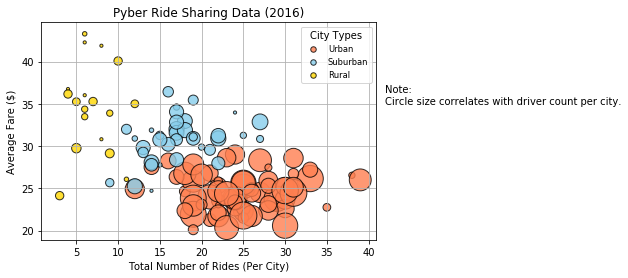

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [23]:
# Calculate Type Percents
# group by city types
group_by_type = data.groupby(["type"])

# calculate total fare by city type
total_fare = group_by_type.sum()
total_fare = total_fare.reset_index()
total_fare

,type,fare,ride_id,driver_count
0,Rural,4327.93,580968240341287,537
1,Suburban,19356.33,3106884522576766,8570
2,Urban,39854.38,7919412664056093,59602


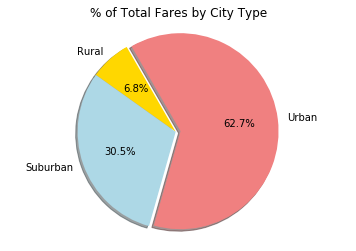

In [33]:
# Build Pie Chart
plt.title("% of Total Fares by City Type")
explode = (0, 0, 0.05)
colors = ["Gold", "lightblue", "lightcoral"]
plt.pie(total_fare["fare"], explode=explode, labels=total_fare["type"],
       colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
# Save Figure
plt.savefig("image/fares")

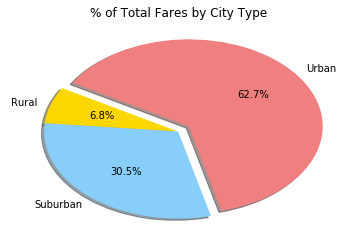

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [25]:
# Calculate Ride Percents
rides = group_by_type.count()
rides = rides.reset_index()
rides

,type,city,date,fare,ride_id,driver_count
0,Rural,125,125,125,125,125
1,Suburban,625,625,625,625,625
2,Urban,1625,1625,1625,1625,1625


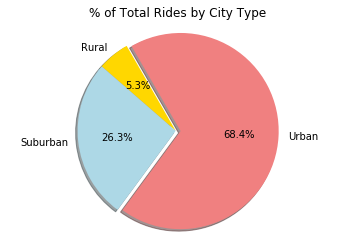

In [34]:
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(rides["ride_id"], explode=explode, labels=total_fare["type"],
       colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
# Save Figure
plt.savefig("image/rides")


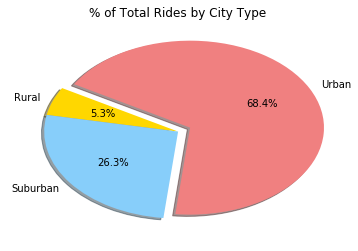

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [39]:
# Calculate Driver Percents
drivers = group_by_type.sum()
drivers = drivers.reset_index()
drivers

,type,fare,ride_id,driver_count
0,Rural,4327.93,580968240341287,537
1,Suburban,19356.33,3106884522576766,8570
2,Urban,39854.38,7919412664056093,59602


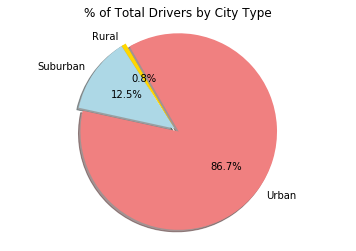

In [40]:
# Build Pie Chart
plt.title("% of Total Drivers by City Type")

plt.pie(drivers["driver_count"], explode=explode, labels=drivers["type"],
       colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

plt.axis("equal")
# Save Figure
plt.savefig("image/drivers")

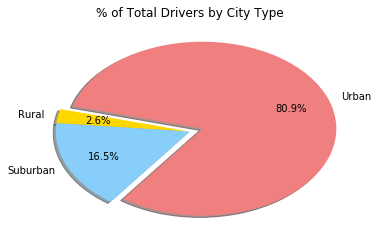

In [6]:
# Show Figure
plt.show()